# Eksperimenti na diedrski grupi
- P(gf z P(0) ~ uniform) ~= 20%? 

## 2. Verjetnost uspešne konvergence
Zanima nas $P( \mathcal L \left(\lim \limits_{t \to \infty}\phi(t) \right) )$

Za n =1 , 2, ..., 10 za vsak D_2n samplamo n_samples=5000 različnih parametrov in z njimi rešujemo ode

In [3]:
import numpy as np
from  gofi.ode.dihedral.plot import get_characters, get_matrices


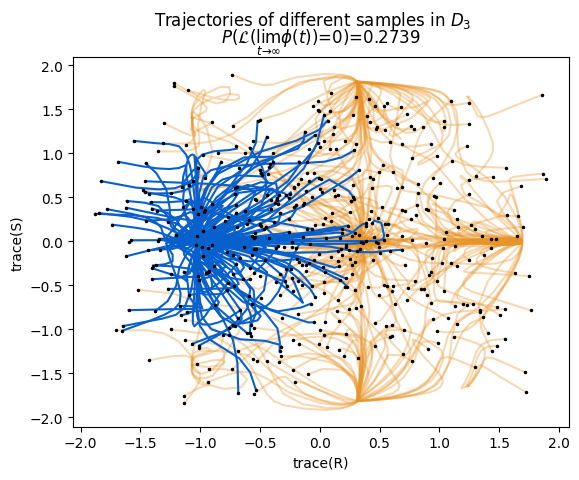

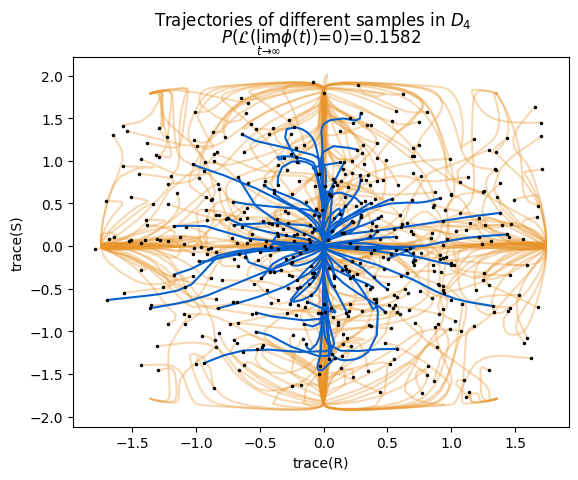

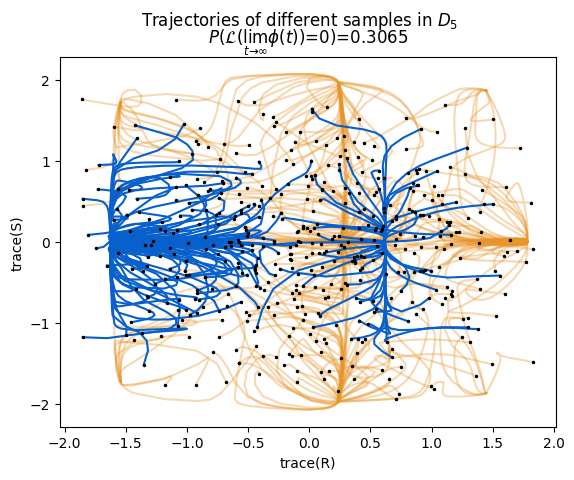

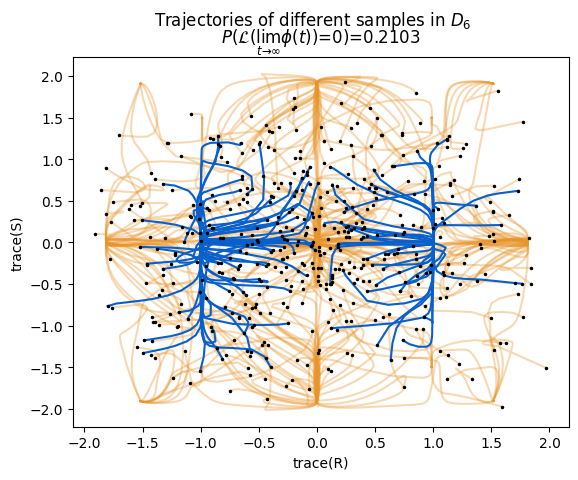

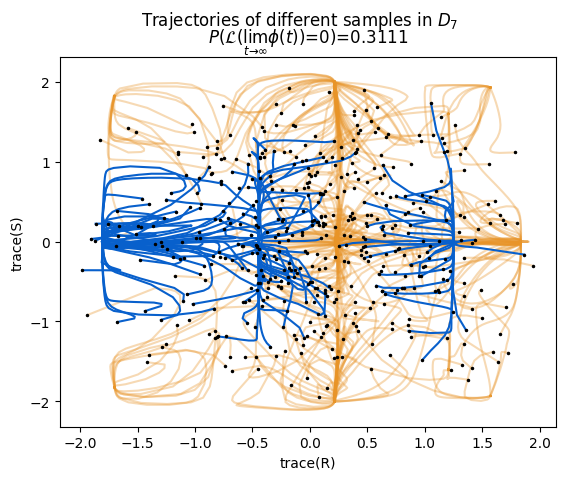

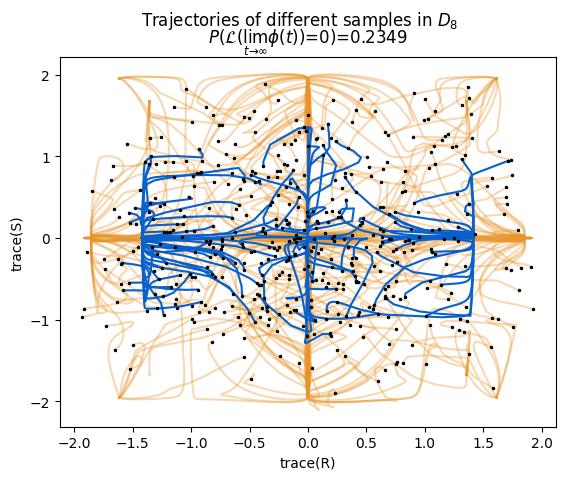

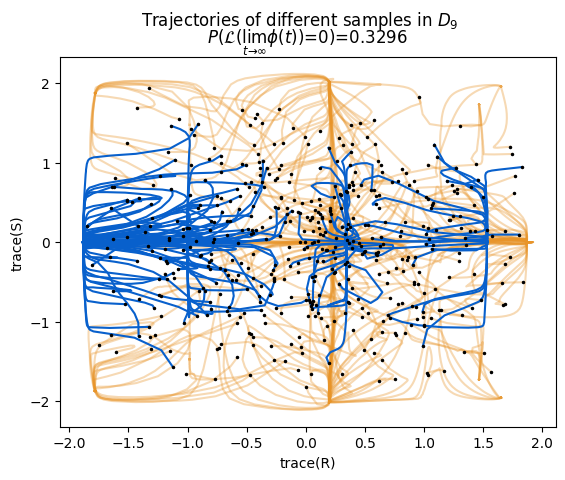

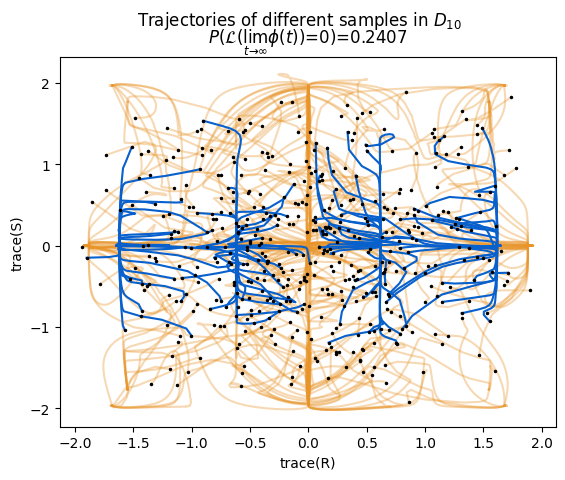

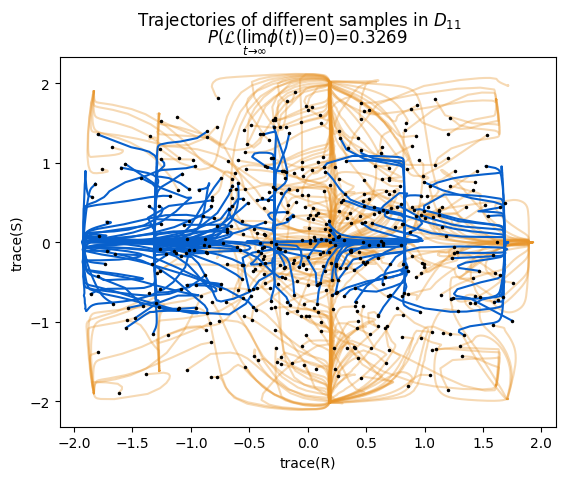

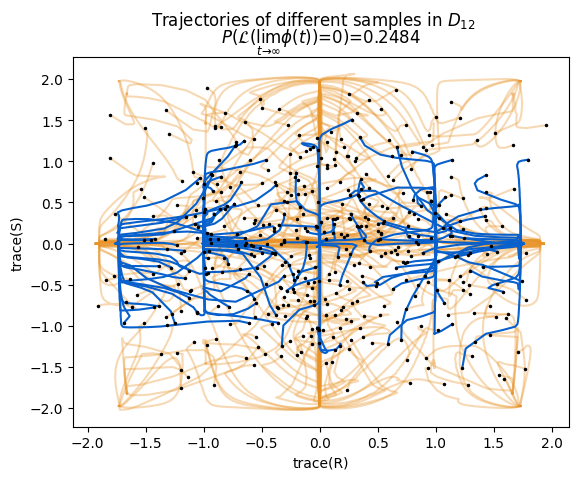

In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from gofi.ode.dihedral.gradient_flow import GradientFlow
from gofi.ode.dihedral.loss import IrreducibilityLoss, UnitaryLoss, RelationLoss

plot_size=500

probs=[]

for n in range(3, 14):
    filename = f'/home/urh/Documents/fmf/magistrska-naloga/gofi/tests/Dn_2dim_sample_20_10000n={n}.npy'
    solutions = np.load(filename, allow_pickle=True)

    gf = GradientFlow(2, 
    IrreducibilityLoss(n) +
    UnitaryLoss() +
    RelationLoss(n), 10)

    

    n_diverges=0



    fig, axs = plt.subplots(1)
    
    plotted = 0
    

    for solution in solutions:

        # get final matrices
        R, S = get_matrices(solution.y, -1, 2)
        loss = gf.loss(R, S)
        
        charR, charS = get_characters(solution.y, 2)
        if loss > 0.1:
           
            n_diverges += 1
           # color = (56/255, 101/255, 75/255, 0.27)
            color = (232/255, 148/255, 40/255, 0.35)
            zorder = 3
        else:
            color = color=(8/255, 96/255, 204/255)
            zorder = 4
        
        if plotted < plot_size:
            # plot curve
            axs.plot(charR, charS, color=color, zorder=zorder)
            # plot initial point
            axs.plot(charR[0], charS[0], '.k', label='Initial point', markersize=3, zorder=5)
            plotted += 1
        

    axs.set_xlabel('trace(R)')
    axs.set_ylabel('trace(S)')
    #axs.legend()
    
    P = (len(solutions) - n_diverges)/len(solutions)
    probs.append(P)
    fig.suptitle(f'Trajectories of different samples in $D_{{{n}}}$')
    axs.set_title(r'$P(\mathcal{L}(\lim _{t \to \infty } \phi(t) ) = 0 ) = $' + str(P))
    plt.savefig(f"prob_of_convergence_D_{n}.pdf")
    plt.show()

print(probs)


In [12]:
for i, p in enumerate(probs):
    n = i + 3
    #perc = p * 100
    fancy = round(p, 2) 
    print(f"$D_{{{n}}}$ & ${fancy}$\\\\")

$D_{3}$ & $0.27$\\
$D_{4}$ & $0.16$\\
$D_{5}$ & $0.31$\\
$D_{6}$ & $0.21$\\
$D_{7}$ & $0.31$\\
$D_{8}$ & $0.23$\\
$D_{9}$ & $0.33$\\
$D_{10}$ & $0.24$\\
$D_{11}$ & $0.33$\\
$D_{12}$ & $0.25$\\
$D_{13}$ & $0.32$\\


## 1. Ali matrike z istim karakterjem konvergirajo k istim vrednostim?
**NE!!!!**
### Plan dela
Za različne vrednosti karakterjev vzorčimo M naključnih matrik $R,S$ z danima karakterjema $charR, charS \in [-N, N]$. 

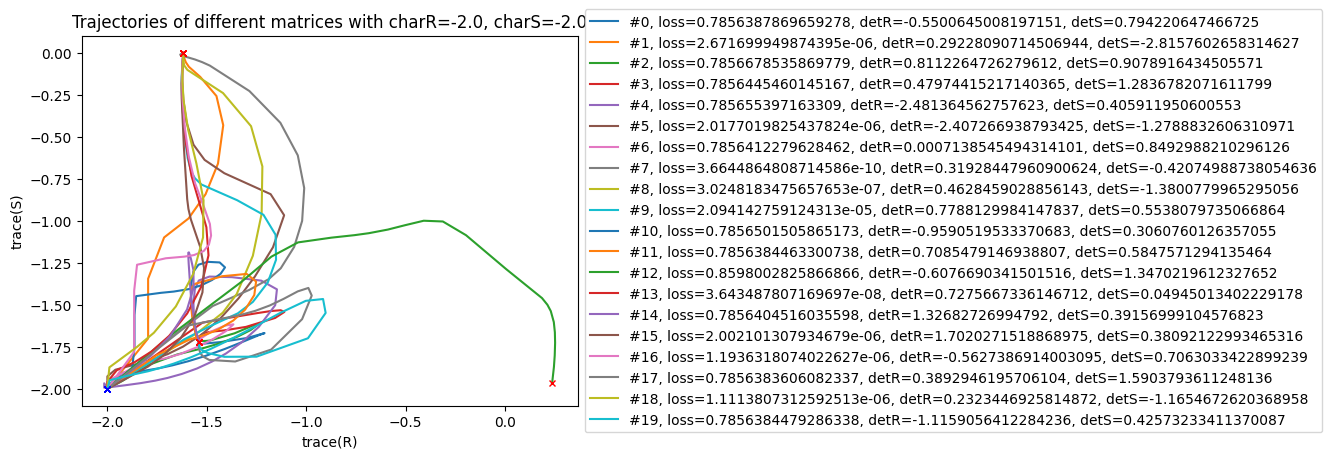

Sample 0: R=
[[-2.24631223  0.83893356]
 [-0.00384973  0.24631223]], S=
[[-1.45618457  0.01175669]
 [-0.19776062 -0.54381543]]
Sample 1: R=
[[-1.7995434  -0.20831984]
 [-0.32857861 -0.2004566 ]], S=
[[-2.99864787 -0.37863925]
 [ 0.47230453  0.99864787]]
Sample 2: R=
[[-1.4379262   0.01252505]
 [-0.23998553 -0.5620738 ]], S=
[[-1.43135254 -0.75044704]
 [ 0.12520091 -0.56864746]]
Sample 3: R=
[[-1.51961122 -0.832413  ]
 [-0.30064407 -0.48038878]], S=
[[-1.18703028  0.36675965]
 [-0.8688484  -0.81296972]]
Sample 4: R=
[[-2.98580017 -0.86944785]
 [ 0.53141514  0.98580017]], S=
[[-1.15418909  0.66096044]
 [ 0.86285613 -0.84581091]]
Sample 5: R=
[[-2.85362047  0.30455182]
 [-0.09404606  0.85362047]], S=
[[-2.60234263  0.35532115]
 [-0.81227545  0.60234263]]
Sample 6: R=
[[-2.02048972  0.10200401]
 [-0.41285761  0.02048972]], S=
[[-1.3264302   0.27215337]
 [ 0.1622045  -0.6735698 ]]
Sample 7: R=
[[-1.37885897  0.72858762]
 [ 0.73729142 -0.62114103]], S=
[[-2.19946671  0.52342463]
 [-0.0343325

In [ ]:
from  gofi.ode.dihedral.plot import get_characters, get_matrices
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

def plot_sample(sample, char=None):
    init_points = sample['init_points']
    solutions = sample['solutions']
    for i in range(len(init_points)):
        # calculate loss
        R, S = get_matrices(solutions[i].y, -1, 2)
        R0, S0 = get_matrices(solutions[i].y, 0, 2)
        l = loss(R, S)
        

        # get characters of i-th trajectory
        charR, charS = get_characters(solutions[i].y, 2)
        # plot trajectory 
        plt.plot(charR, charS, label=f"#{i}, loss={l}, detR={np.linalg.det(R0)}, detS={np.linalg.det(S0)}")
        # plot initial point
        plt.plot(charR[0], charS[0], 'xb', markersize=4) 
        # plot final point
        plt.plot(charR[-1], charS[-1], 'xr', markersize=4) 
    plt.xlabel('trace(R)')
    plt.ylabel('trace(S)')
    plt.title(f"Trajectories of different matrices with charR={charR[0]}, charS={charS[0]}")
    plt.legend()

    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

plot_sample(samples[0])

for i, (R,S) in enumerate(samples[0]['init_points']): 
    pass
    #print(f"Sample {i}: R=\n{R}, S=\n{S}")



  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:34<00:00,  1.43it/s]


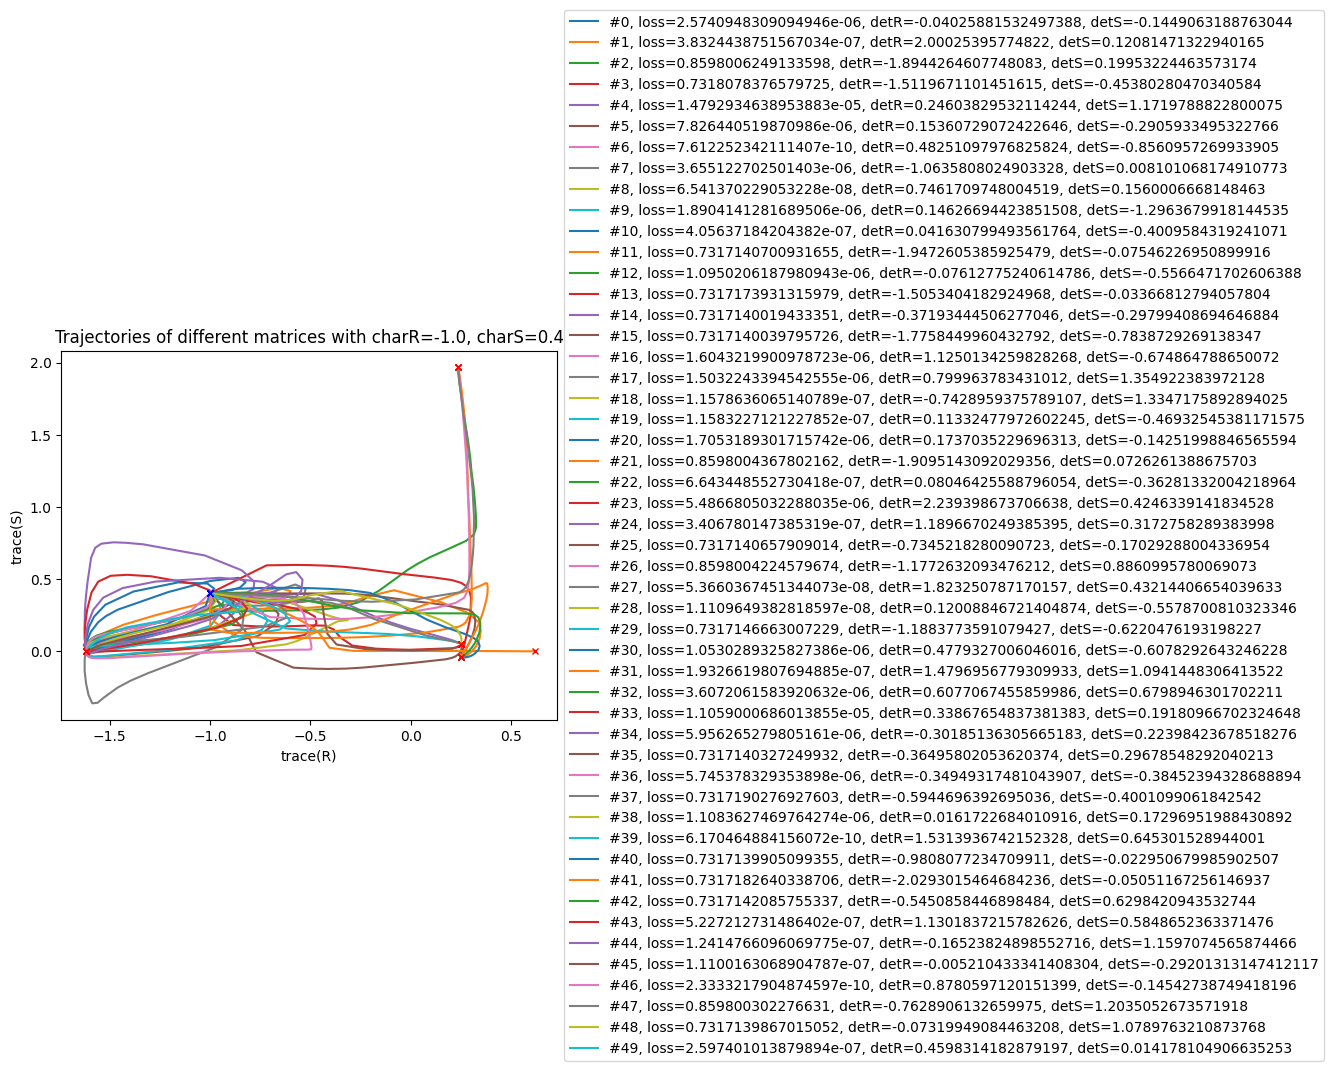

In [49]:
from tqdm import tqdm
trR = -1 
antidiagR = -1 

trS = 0.4
antidiagS = 0.6



fig = plt.figure()
ax = plt.subplot(111)
n_samples = 50
for i in tqdm(range(n_samples), total=n_samples):
    a = np.random.rand()*2 - 1
    b = np.random.rand()*2 - 1
    R0 = np.array([[a, b],[antidiagR - b, trR - a]]) 
    a = np.random.rand()*2 - 1
    b = np.random.rand()*2 - 1
    S0 = np.array([[a, b],[antidiagS - b, trS - a]]) 
    # run 
    solution = gf.solve(R0, S0, t_max=5)
    
    # get loss
    R, S = get_matrices(solution.y, -1, 2)
    l = loss(R, S)
    # get characters
    charR, charS = get_characters(solution.y, 2)
    # plot trajectory 
    plt.plot(charR, charS, label=f"#{i}, loss={l}, detR={np.linalg.det(R0)}, detS={np.linalg.det(S0)}")
    # plot initial point
    plt.plot(charR[0], charS[0], 'xb', markersize=4) 
    # plot final point
    plt.plot(charR[-1], charS[-1], 'xr', markersize=4) 
plt.xlabel('trace(R)')
plt.ylabel('trace(S)')
plt.title(f"Trajectories of different matrices with charR={charR[0]}, charS={charS[0]}")
plt.legend()

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
    